# Complete Statistical Analysis


Summary Statistics

In [21]:
import pandas as pd
data = pd.read_csv('cancer.csv')

data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]

print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("standart deviation (std): ",data_bening.radius_mean.std())
print("describe method: ",data_bening.radius_mean.describe())

mean:  12.146523809523808
variance:  3.1702217220438738
standart deviation (std):  1.7805116461410393
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


Outliers

In [22]:
desc = data_bening.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


Boxplot

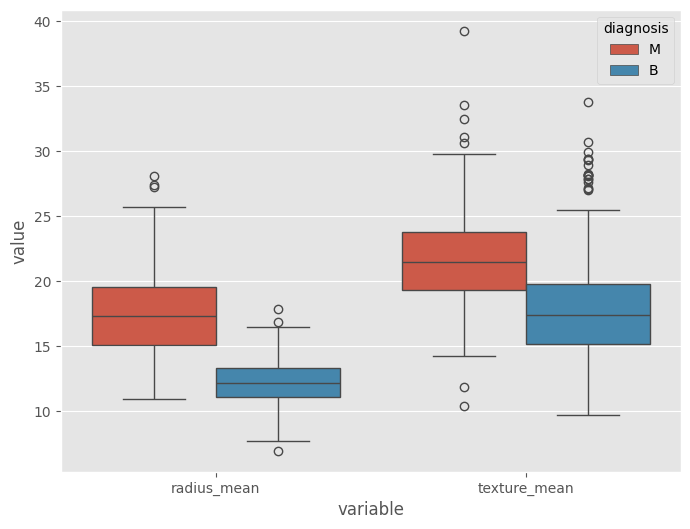

In [25]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (8,6))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

CDF

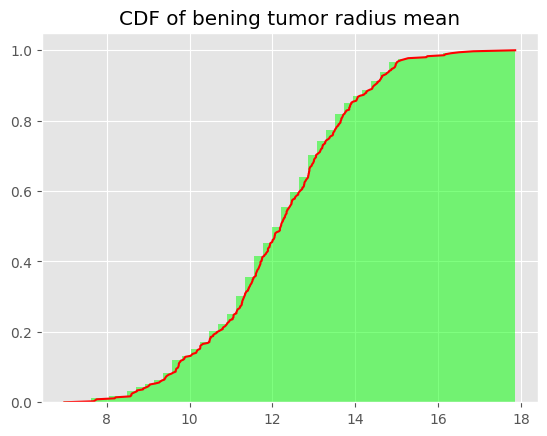

In [30]:
plt.hist(data_bening.radius_mean,bins=50,fc=(0,1,0,0.5),label='Bening', density = True,cumulative = True)
sorted_data = np.sort(data_bening.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF of bening tumor radius mean')
plt.show()

Correlation

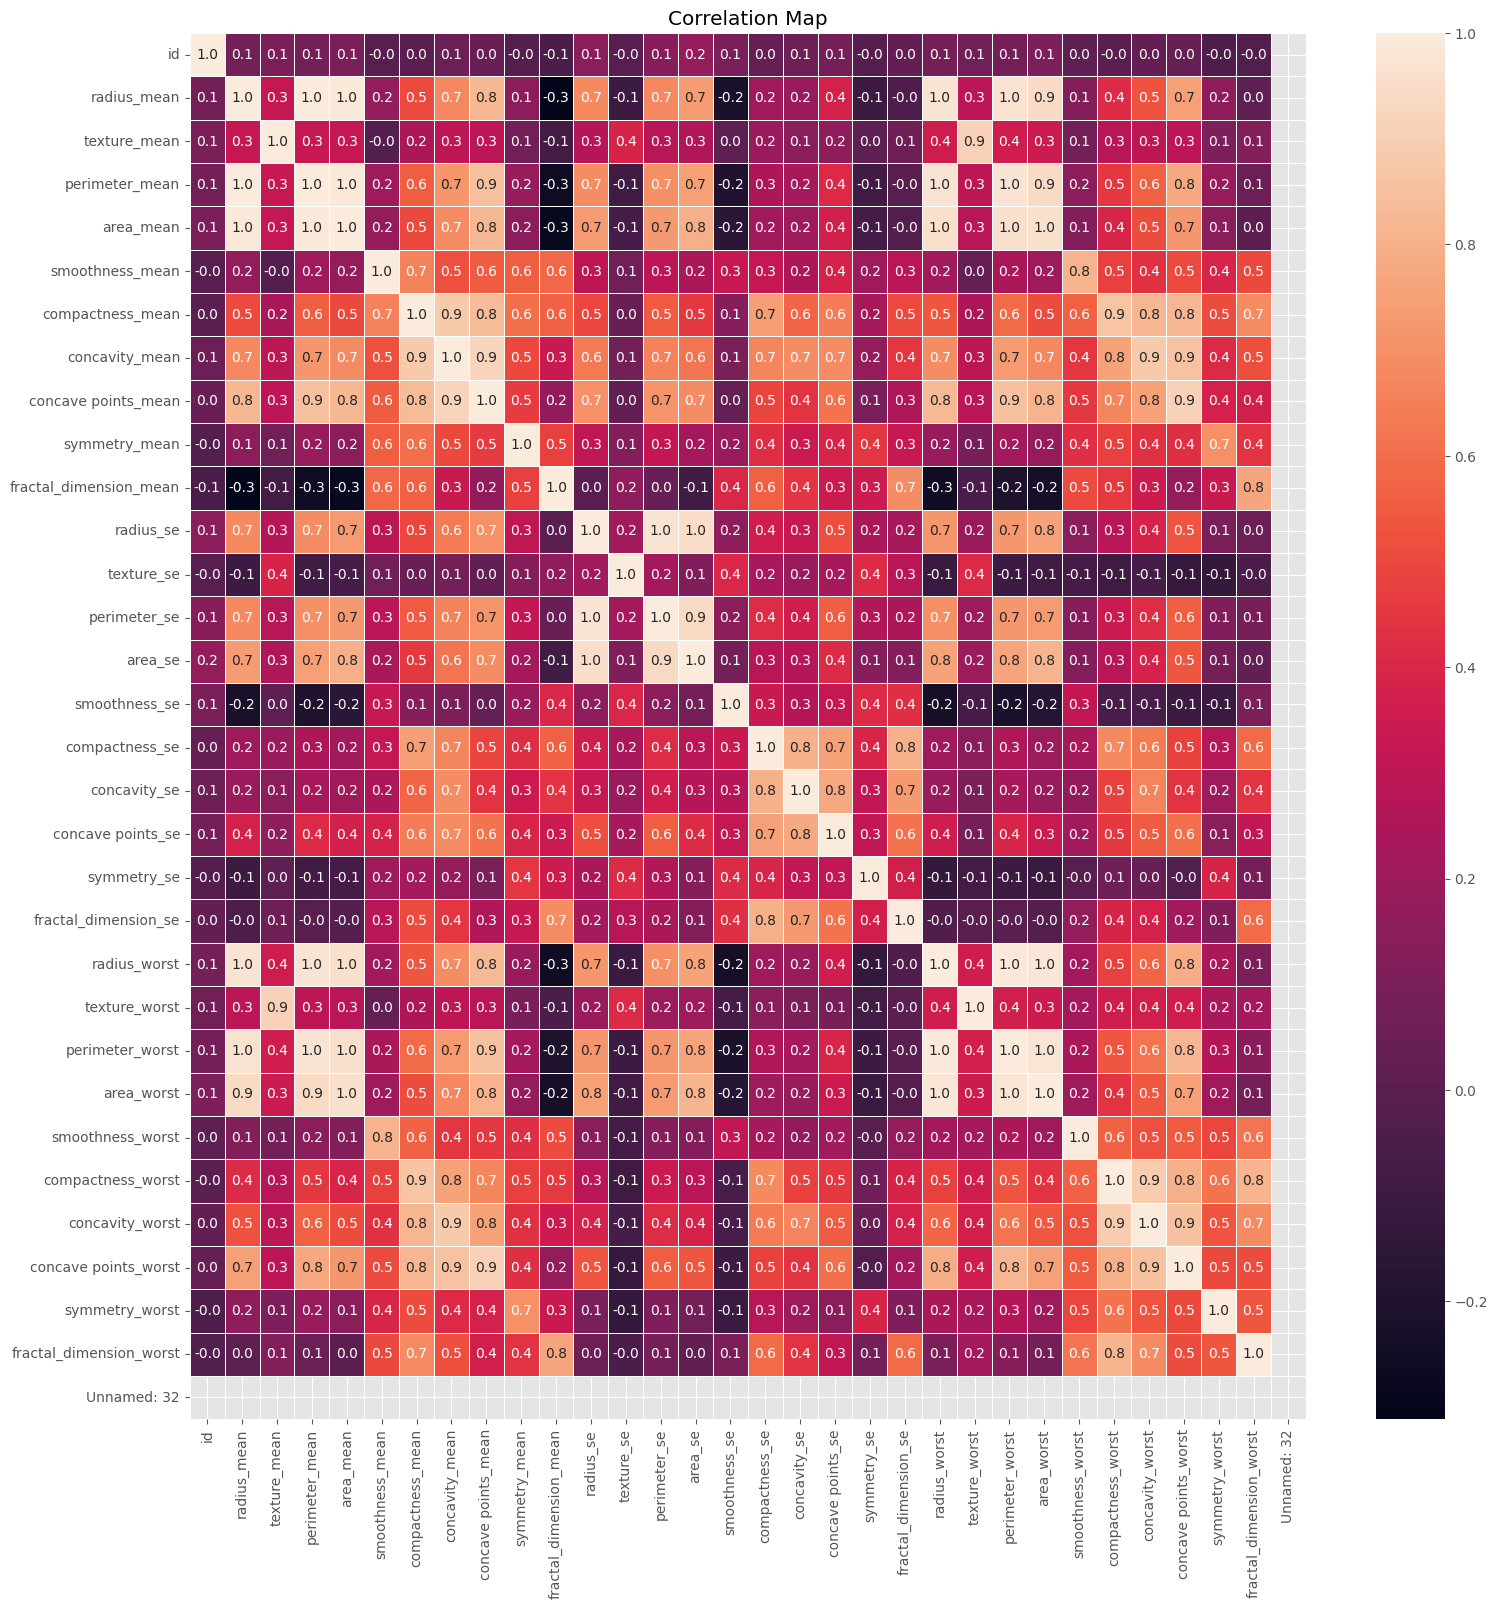

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data.select_dtypes(include=['number'])

f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

Covariance

In [34]:
np.cov(data.radius_mean,data.area_mean)
print("Covariance between radius mean and area mean: ",data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.4834093464567
Covariance between radius mean and fractal dimension se:  -0.0003976248576440628


Pearson Correlation

In [35]:
p1 = data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.9873571700566125


Hypothesis Testing

In [36]:
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)

p-value:  1.5253492492559045e-184


Gaussian Distribution and z-score

mean:  109.84964888907965
standart deviation:  19.991688883764507


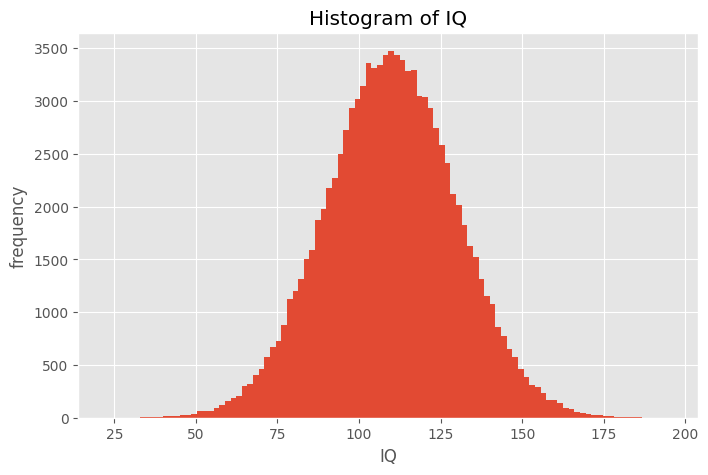

In [40]:
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))

plt.figure(figsize = (8,5))
plt.hist(s, 100, density=False)
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()